In [1]:
import data as dt
import regressor as rg
import numpy as np

In [2]:
# dataset file path
file_path = "CCPP/Folds5x2_pp.xlsx"

In [3]:
data = dt.readData(file_path)                            # reads excel file sheet
test_set = data[0:1000]                                  # data is a pandas dataframe                  
training = data[1000:]

In [4]:
n = 5                                                   # 5 cross fold validation
M = 15                                                   # Polynomial  maximum degree
reg  = rg.Regressor()       

In [5]:
tr_rms = np.zeros(M-1)               # training Erms
t_rms  = np.zeros(M-1)              # testing error root mean square
v_rms = np.zeros(M-1)              # validation error root mean square
valid_std = np.zeros(M-1)          # validation Erms standard deviation

In [7]:

for m in range(1,M):
    valid_rms = np.zeros(n)               # (n) dimesional vector 
    train_rms = np.zeros(n)
    Weights   = np.zeros((m+1,n))         # (m+1 X n) Matrix
    
    for i in range(n):
        train_set, valid_set = dt.crossfold(training,n,i) # Divide training data to two sets at round i of the n-cross fold  
       
        Xtr = dt.getColumn(train_set, ['V'])              # Read training data. (N X 1 ) Vector. One Input feature
        Ytr = dt.getColumn(train_set, ['PE'])             # (N X 1 ) Vector
        
        Xval = dt.getColumn(valid_set, ['V'])             # Read validation data
        Yval = dt.getColumn(valid_set, ['PE'])      
    
        W1 = reg.poly_fit(Xtr, Ytr, m)                   # Polynomial Coefficients. (d+1) vector 
        Weights[:, i] = W1.reshape(W1.shape[0])          
        
        
        yval_predicted = reg.predict(Xval, W1, m)        # Predict validation output Yval using the generated model W1
        valid_rms[i]   = reg.error_rms(Yval , yval_predicted.reshape(Yval.shape))  # calculate Erms for the predicted values
    
        
        ytrain_predicted = reg.predict(Xtr, W1,m)       # Prediction for training data
        train_rms[i]     = reg.error_rms(Ytr, ytrain_predicted.reshape(Ytr.shape))   # Training Erms
            
    v_rms[m-1]  = np.mean(valid_rms)                   # Validation Erms mean of the n folds
    valid_std[m-1]   = np.std (valid_rms)              # Erms standard deviation of the n folds
    tr_rms[m-1] = np.mean(train_rms)                   # Training Erms mean of the n folds 
    
    
    min_indx    = np.argsort(valid_rms)[0]             # model with leaset validation erms
    
    W = Weights[:, min_indx]                           # Weights of the model with the leaset error root mean square
    
    Xtest = dt.getColumn(test_set, ['V'])              # Read testing data
    Ytest = dt.getColumn(test_set, ['PE'])             
    
    ytest_predicted = reg.predict(Xtest, W,m)
    t_rms[m-1]      = reg.error_rms(Ytest, ytest_predicted.reshape(Ytest.shape))   # Testing data

valid Erms :  [   8.43116075    8.1212967     8.12181401    8.02837726    7.88129218
    7.86855854    7.77435702   11.4393751   528.43175957  236.19461829
  812.21094633  180.77703     425.6188104  1633.08988673]
Training Erms :  [   8.43788852    8.12219975    8.11665296    8.02362934    7.8784024
    7.86401501    7.76945067   11.4828395   526.64449182  236.43630472
  806.2915942   180.99465712  424.41221802 1655.64021362]
Testing Erms :  [  8.28687516   7.88474996   7.90781129   7.89631774   7.73106715
   7.72271201   7.56222795   8.11455946  29.99722265 105.67912408
  68.44243134  96.00246941  45.57095071 167.56877716]


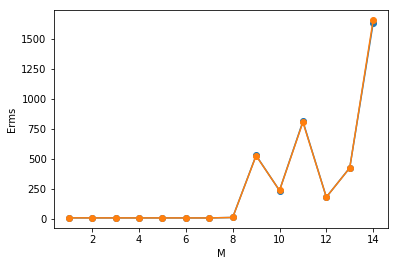

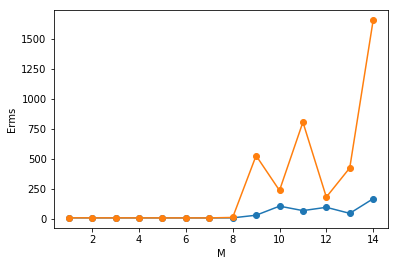

Polynomial Degree with the lowest validaiton Erms :  7


In [8]:
print("valid Erms : " ,v_rms)
print("Training Erms : " , tr_rms)
print("Testing Erms : ", t_rms)

dt.plotrms(v_rms, tr_rms, 0)
dt.plotrms(t_rms, tr_rms,1)

min_validrms = np.argsort(v_rms)[0]
print("Polynomial Degree with the lowest validaiton Erms : " , min_validrms+1)



<Container object of 3 artists>

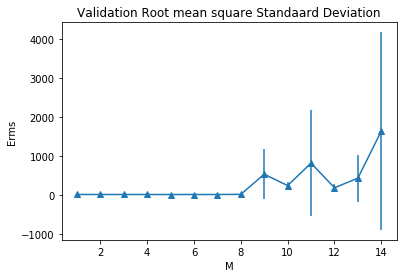

In [9]:
import matplotlib.pyplot as plt 

plt.title("Validation Root mean square Standaard Deviation")
plt.xlabel("M")
plt.ylabel("Erms")
x  = range(1,len(v_rms)+1)
plt.errorbar(x, v_rms, valid_std, marker='^')

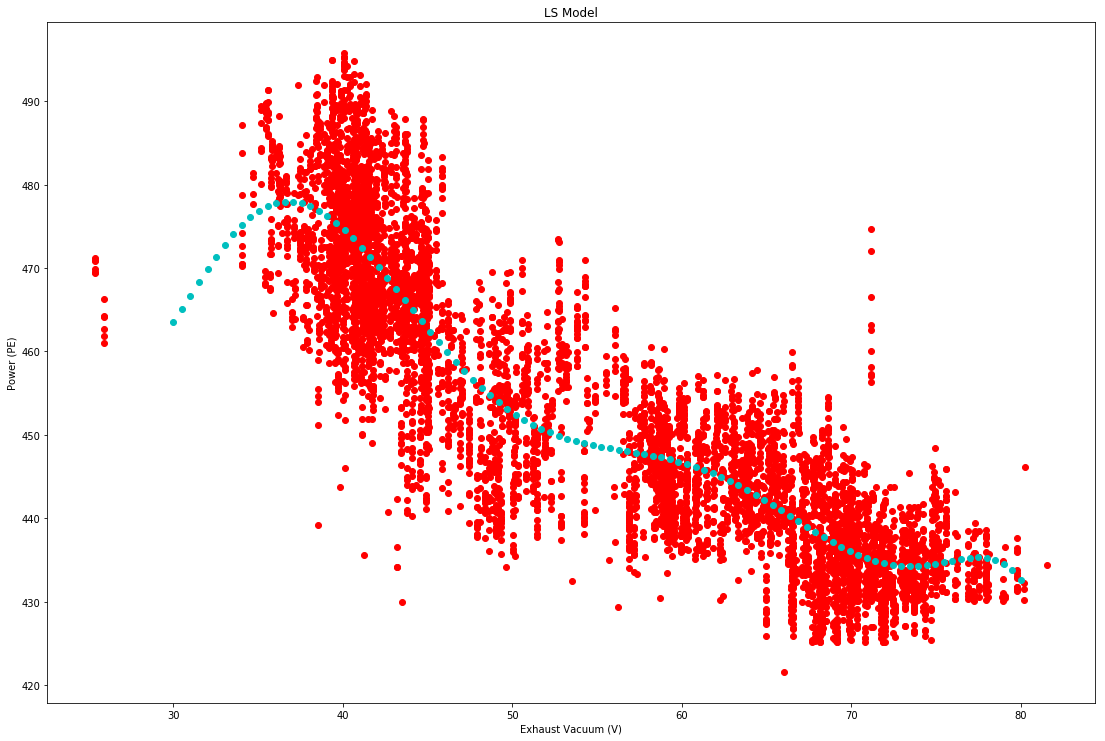

In [10]:
W_7= reg.poly_fit(Xtr, Ytr, 7)
W_7 = np.append( W_7[-1], W_7[:len(W_7)-1])
plt.figure(figsize=(6*3.13,4*3.13))
plt.title("LS Model")
plt.xlabel("Exhaust Vacuum (V)")
plt.ylabel("Power (PE)")
plt.plot(Xtr[:, 0], Ytr[:, 0], 'ro')
x= np.linspace(30, 80, 100)
y= W_7[0]
for i in range (1, len(W_7)):
    y = y + (W_7[i] *x**(i))
plt.plot(x,y,'co')
plt.show()